In [1]:
import pandas as pd
sat = pd.read_excel('C:/Users/elija/OneDrive/Desktop/Final Project/Week 2/satisfaction_2015.xlsx')

In [86]:
pwd

'C:\\Users\\elija\\Bethel Tech Final Project'

In [2]:
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
sat.head(1)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0


In [4]:
sat.tail(1)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
129879,10198,satisfied,Female,Loyal Customer,47,Business travel,Business,3939,1,1,...,5,5,2,5,4,5,4,5,0,0.0


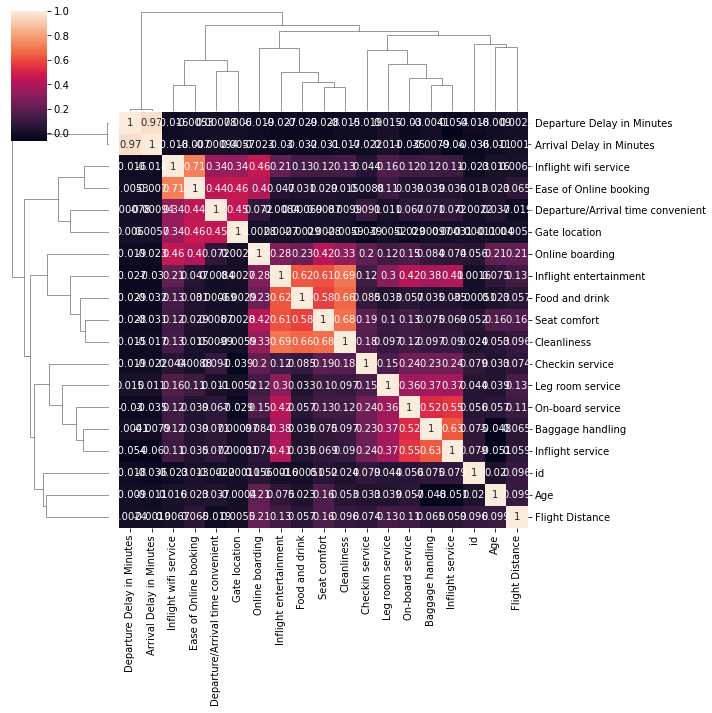

In [5]:
sns.clustermap(sat.corr(),annot=True)

In [6]:
sat.columns = sat.columns.str.replace(' ','_')

In [7]:
dummy = pd.get_dummies(sat[['Type_of_Travel','Class','Gender','Customer_Type']])
dummy

,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer
0,0,1,0,1,0,0,1,0,1
1,0,1,0,1,0,0,1,0,1
2,0,1,0,1,0,0,1,0,1
3,0,1,0,1,0,1,0,0,1
4,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
129875,1,0,1,0,0,1,0,1,0
129876,1,0,0,1,0,1,0,1,0
129877,1,0,1,0,0,0,1,1,0
129878,1,0,1,0,0,1,0,1,0


In [8]:
dummy.columns = dummy.columns.str.replace(' ','_')

In [9]:
sat = pd.concat([sat, dummy], axis = 1)

In [10]:
sat

,id,satisfaction_v2,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Arrival_Delay_in_Minutes,Type_of_Travel_Business_travel,Type_of_Travel_Personal_Travel,Class_Business,Class_Eco,Class_Eco_Plus,Gender_Female,Gender_Male,Customer_Type_Loyal_Customer,Customer_Type_disloyal_Customer
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,0.0,0,1,0,1,0,0,1,0,1
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,0.0,0,1,0,1,0,0,1,0,1
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,0.0,0,1,0,1,0,0,1,0,1
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,0.0,0,1,0,1,0,1,0,0,1
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,0.0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,49202,satisfied,Female,Loyal Customer,35,Business travel,Business,2592,5,5,...,0.0,1,0,1,0,0,1,0,1,0
129876,16986,satisfied,Female,Loyal Customer,11,Business travel,Eco,610,5,1,...,65.0,1,0,0,1,0,1,0,1,0
129877,50316,satisfied,Male,Loyal Customer,46,Business travel,Business,86,1,1,...,0.0,1,0,1,0,0,0,1,1,0
129878,22333,satisfied,Female,Loyal Customer,35,Business travel,Business,83,1,1,...,0.0,1,0,1,0,0,1,0,1,0


## Anovas for business and personal


In [11]:
def bus_per(type):
    if type == 'Personal Travel':
        return 1
    elif type == 'Business travel':
        return 0


In [12]:
sat['Type_of_TravelR'] = sat['Type_of_Travel'].apply(bus_per)

In [13]:
sat.head(1)

,id,satisfaction_v2,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Type_of_Travel_Business_travel,Type_of_Travel_Personal_Travel,Class_Business,Class_Eco,Class_Eco_Plus,Gender_Female,Gender_Male,Customer_Type_Loyal_Customer,Customer_Type_disloyal_Customer,Type_of_TravelR
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,0,1,0,1,0,0,1,0,1,1


In [14]:
sat.tail(1)

,id,satisfaction_v2,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Type_of_Travel_Business_travel,Type_of_Travel_Personal_Travel,Class_Business,Class_Eco,Class_Eco_Plus,Gender_Female,Gender_Male,Customer_Type_Loyal_Customer,Customer_Type_disloyal_Customer,Type_of_TravelR
129879,10198,satisfied,Female,Loyal Customer,47,Business travel,Business,3939,1,1,...,1,0,1,0,0,1,0,1,0,0


<AxesSubplot:xlabel='Departure/Arrival_time_convenient', ylabel='Count'>

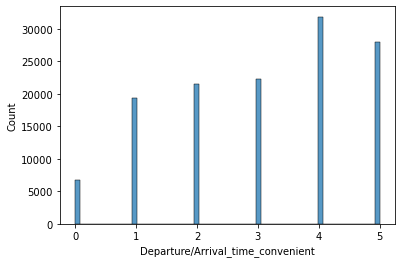

In [15]:
sns.histplot(sat['Departure/Arrival_time_convenient']) 

In [16]:
sat['Departure/Arrival_time_convenient_sqr'] = sat['Departure/Arrival_time_convenient']*sat['Departure/Arrival_time_convenient']

<AxesSubplot:xlabel='Departure/Arrival_time_convenient_sqr', ylabel='Count'>

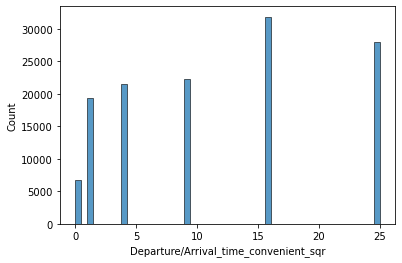

In [17]:
sns.histplot(sat['Departure/Arrival_time_convenient_sqr']) 

In [18]:
sat2 = sat[['Type_of_TravelR','Departure/Arrival_time_convenient_sqr','Type_of_Travel']]

In [19]:
stats.f_oneway(sat['Departure/Arrival_time_convenient'][sat['Type_of_Travel']== 'Personal Travel'],
              sat['Departure/Arrival_time_convenient'][sat['Type_of_Travel']== 'Business travel'])

F_onewayResult(statistic=9192.743745788075, pvalue=0.0)

### siginficant difference

In [20]:
convenientposthoc = MultiComparison(sat2['Departure/Arrival_time_convenient_sqr'], sat2['Type_of_TravelR'])
convenientposthocresult = convenientposthoc.tukeyhsd()
print(convenientposthocresult)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    5.056 0.001 4.9559 5.1561   True
-------------------------------------------------


## Data wrangling for ages

In [21]:
def age_sixty(age):
    if age >= 60:
        return 0
    elif age < 60:
        return 1

sat['Age_divided_at_60'] = sat['Age'].apply(age_sixty)

In [22]:
def age_thirty(age):
    if age >= 30:
        return 0
    elif age < 30:
        return 1
    
sat['Age_30'] = sat['Age'].apply(age_thirty)

In [23]:
def age_twentyfive(age):
    if age >= 25:
        return 0
    elif age < 25:
        return 1

sat['Age_25'] = sat['Age'].apply(age_twentyfive)

In [24]:
sat.head(1)

,id,satisfaction_v2,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Class_Eco_Plus,Gender_Female,Gender_Male,Customer_Type_Loyal_Customer,Customer_Type_disloyal_Customer,Type_of_TravelR,Departure/Arrival_time_convenient_sqr,Age_divided_at_60,Age_30,Age_25
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,0,0,1,0,1,1,4,1,0,0


## Baggage Handling

<AxesSubplot:xlabel='Baggage_handling', ylabel='Count'>

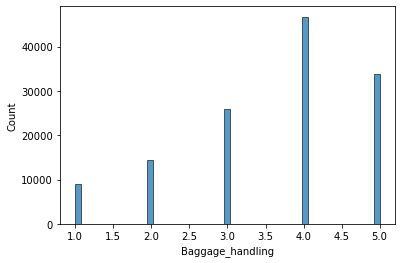

In [25]:
sns.histplot(sat['Baggage_handling'])

In [26]:
sat['Baggage_handlingCube'] = sat['Baggage_handling'] **3

<AxesSubplot:xlabel='Baggage_handlingCube', ylabel='Count'>

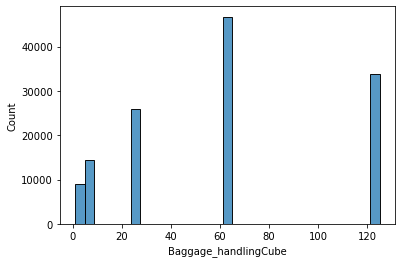

In [27]:
sns.histplot(sat['Baggage_handlingCube'])

In [28]:
dv = "Baggage_handlingCube"
cols = list(dummy.columns) + ['Age_divided_at_60']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:2]:
    string_var = string_var + " + C(" + col +")"
string_var

'Baggage_handlingCube ~ C(Type_of_Travel_Business_travel) + C(Type_of_Travel_Personal_Travel)'

In [29]:
cols

['Type_of_Travel_Business_travel',
 'Type_of_Travel_Personal_Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco_Plus',
 'Gender_Female',
 'Gender_Male',
 'Customer_Type_Loyal_Customer',
 'Customer_Type_disloyal_Customer',
 'Age_divided_at_60']

In [30]:
model =ols (string_var, data =sat).fit()

In [31]:
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),5.968749e+07,1.0,32073.995156,0.0
C(Type_of_Travel_Personal_Travel),3.128750e+07,1.0,16812.818615,0.0
Residual,2.416940e+08,129878.0,NaN,NaN


## Age 30

In [32]:
dv = "Baggage_handling"
cols = list(dummy.columns)[2:5] + ['Age_30']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols:
    string_var = string_var + " + C(" + col +")"


string_var

string_var = 'Baggage_handling ~ C(Age_30):C(Class_Business) + C(Age_30) + C(Class_Business)' 
model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Age_30),780.464396,1.0,581.005895,4.341179e-128
C(Class_Business),5998.169570,1.0,4465.254147,0.000000e+00
C(Age_30):C(Class_Business),212.918457,1.0,158.504192,2.521874e-36
Residual,174462.246794,129876.0,NaN,NaN


<AxesSubplot:xlabel='Age_30', ylabel='Baggage_handling'>

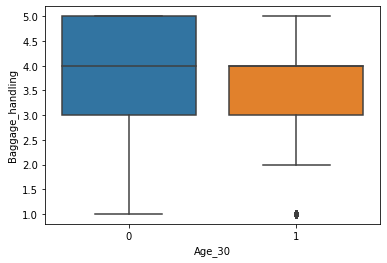

In [33]:
sns.boxplot(data=sat, x = 'Age_30', y= 'Baggage_handling')

## class and age and type of travel have effect

##  Check in service

<AxesSubplot:xlabel='Checkin_service', ylabel='Count'>

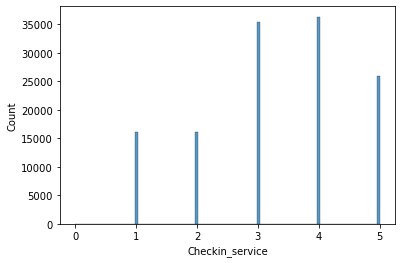

In [34]:
sns.histplot(sat['Checkin_service'])

<AxesSubplot:xlabel='Checkin_serviceSQ', ylabel='Count'>

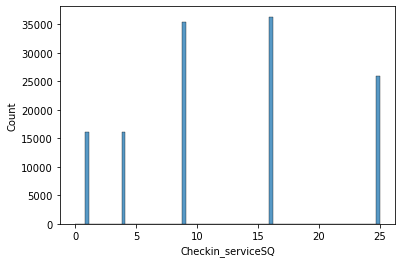

In [35]:
sat['Checkin_serviceSQ'] = sat['Checkin_service'] ** 2
sns.histplot(sat['Checkin_serviceSQ'])

In [36]:
dv = "Checkin_serviceSQ"
cols = list(dummy.columns) + ['Age_divided_at_60']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),2.768561e+04,1.0,455.662734,6.305169e-101
C(Type_of_Travel_Personal_Travel),5.940984e+05,1.0,9777.950511,0.000000e+00
C(Class_Business),5.856583e+05,1.0,9639.039054,0.000000e+00
C(Class_Eco),1.915079e+03,1.0,31.519262,1.978733e-08
C(Class_Eco_Plus),1.827820e+01,1.0,0.300831,5.833627e-01
C(Gender_Female),4.000428e+05,1.0,6584.092610,0.000000e+00
C(Gender_Male),4.310076e+05,1.0,7093.725398,0.000000e+00
C(Customer_Type_Loyal_Customer),2.128784e+05,1.0,3503.652975,0.000000e+00
C(Customer_Type_disloyal_Customer),2.583733e+05,1.0,4252.429384,0.000000e+00
C(Age_divided_at_60),5.338908e+03,1.0,87.870248,7.096205e-21


## Age and class sig dif

## Cleanliness

<AxesSubplot:xlabel='Cleanliness', ylabel='Count'>

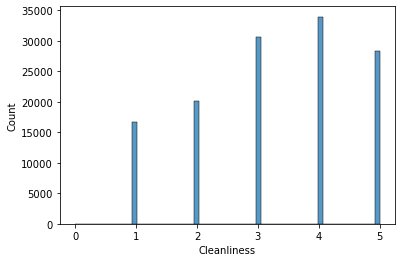

In [37]:
sns.histplot(sat['Cleanliness'])

<AxesSubplot:xlabel='CleanlinessSQ', ylabel='Count'>

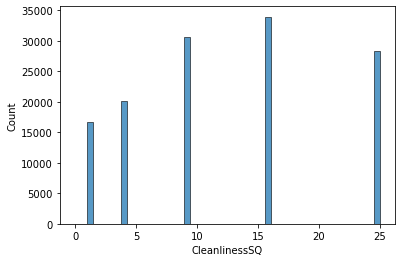

In [38]:
sat['CleanlinessSQ'] = sat['Cleanliness'] ** 2
sns.histplot(sat['CleanlinessSQ'])

In [39]:
dv = "CleanlinessSQ"
cols = list(dummy.columns) + ['Age_divided_at_60']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),3.046866e+05,1.0,4547.775059,0.000000e+00
C(Type_of_Travel_Personal_Travel),1.135143e+05,1.0,1694.323217,0.000000e+00
C(Class_Business),2.067606e+05,1.0,3086.125080,0.000000e+00
C(Class_Eco),3.010131e+04,1.0,449.294529,1.516233e-99
C(Class_Eco_Plus),6.452306e+03,1.0,96.307618,1.001587e-22
C(Gender_Female),3.413625e+05,1.0,5095.202441,0.000000e+00
C(Gender_Male),3.420314e+05,1.0,5105.186357,0.000000e+00
C(Customer_Type_Loyal_Customer),5.476528e+05,1.0,8174.307971,0.000000e+00
C(Customer_Type_disloyal_Customer),4.822616e+04,1.0,719.827389,3.953414e-158
C(Age_divided_at_60),4.931024e+03,1.0,73.600844,9.665298e-18


## Significant in loyalty and class

In [40]:
sat.head(1)

,id,satisfaction_v2,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Customer_Type_Loyal_Customer,Customer_Type_disloyal_Customer,Type_of_TravelR,Departure/Arrival_time_convenient_sqr,Age_divided_at_60,Age_30,Age_25,Baggage_handlingCube,Checkin_serviceSQ,CleanlinessSQ
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,0,1,1,4,1,0,0,27,9,9


 ## Food and Drink

<AxesSubplot:xlabel='Food_and_drink', ylabel='Count'>

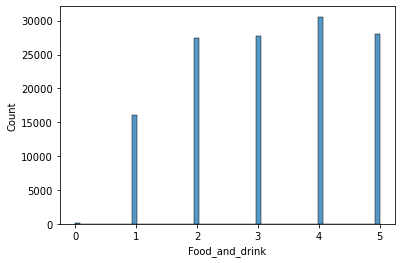

In [41]:
sns.histplot(sat['Food_and_drink'])

<AxesSubplot:xlabel='Food_and_drinkSQ', ylabel='Count'>

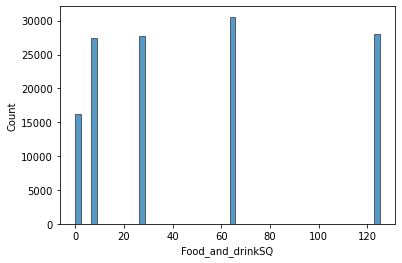

In [42]:
sat['Food_and_drinkSQ'] = sat['Food_and_drink'] ** 3
sns.histplot(sat['Food_and_drinkSQ'])

In [85]:
scipy.stats.bartlett(sat['Food_and_drink'], sat['Type_of_Travel_Business_travel'])

BartlettResult(statistic=124078.68298372463, pvalue=0.0)

In [80]:
dv = "Food_and_drink"
cols = list(dummy.columns) + ['Age_divided_at_60']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in list(cols[:2]) + [cols[0]]:
    string_var = string_var + " + C(" + col +")"
string_var

string_var ='Food_and_drink ~ C(Type_of_Travel)'
model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel),1093.260260,1.0,621.058391,9.247312e-137
Residual,228626.580085,129878.0,NaN,NaN


## Not Significantly diff

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Food_and_drink   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     621.1
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          9.25e-137
Time:                        12:34:25   Log-Likelihood:            -2.2101e+05
No. Observations:              129880   AIC:                         4.420e+05
Df Residuals:                  129878   BIC:                         4.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  2.1113      0.003    795.291      0.000       2.106       2.117
C(Type_of_Travel_Business_travel)[T.1]     1.1549      0.004    313.282      0.000       1.148       1.162
C(Type_of_Travel_Personal_Travel)[T.1]     0.9564      0.005    205.555      0.000       0.947       0.966
==============================================================================
Omnibus:                    70466.266   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7489.648
Skew:                          -0.148   Prob(JB):                         0.00
Kurtosis:                       1.861   Cond. No.                     3.81e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.43e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:xlabel='Type_of_Travel', ylabel='Food_and_drink'>

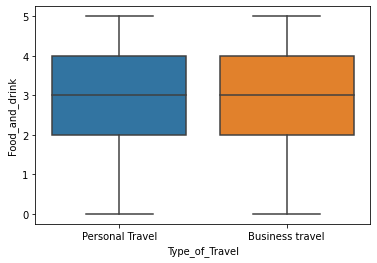

In [79]:
sns.boxplot(data=sat, x = 'Type_of_Travel', y = 'Food_and_drink')

 ##  Inflight entertainment

<AxesSubplot:xlabel='Inflight_entertainment', ylabel='Count'>

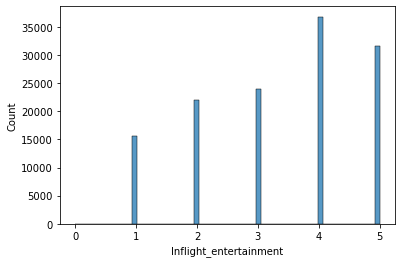

In [44]:
sns.histplot(sat['Inflight_entertainment'])

<AxesSubplot:xlabel='Inflight_entertainmentcube', ylabel='Count'>

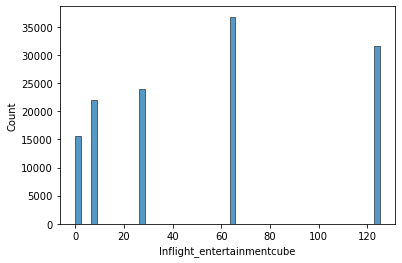

In [45]:
sat['Inflight_entertainmentcube'] = sat['Inflight_entertainment'] ** 3
sns.histplot(sat['Inflight_entertainmentcube'])

In [46]:
dv = "Inflight_entertainmentcube"
cols = list(dummy.columns) + ['Age_divided_at_60']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),8.880881e+06,1.0,4469.475770,0.000000e+00
C(Type_of_Travel_Personal_Travel),3.236877e+05,1.0,162.902139,2.767185e-37
C(Class_Business),5.575760e+06,1.0,2806.109665,0.000000e+00
C(Class_Eco),2.330477e+05,1.0,117.285809,2.553223e-27
C(Class_Eco_Plus),5.036578e+02,1.0,0.253476,6.146392e-01
C(Gender_Female),5.306369e+06,1.0,2670.533535,0.000000e+00
C(Gender_Male),5.102086e+06,1.0,2567.724066,0.000000e+00
C(Customer_Type_Loyal_Customer),1.482940e+07,1.0,7463.183376,0.000000e+00
C(Customer_Type_disloyal_Customer),1.799193e+04,1.0,9.054789,2.620579e-03
C(Age_divided_at_60),2.007386e+05,1.0,101.025617,9.263797e-24


## Sig dif

## Leg room

<AxesSubplot:xlabel='Leg_room_service', ylabel='Count'>

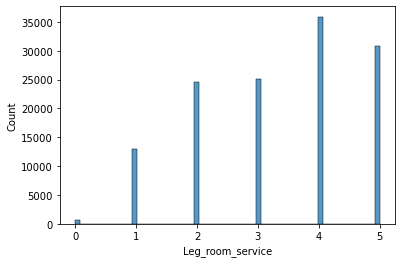

In [47]:
sns.histplot(sat['Leg_room_service'])

<AxesSubplot:xlabel='Leg_roomSQ', ylabel='Count'>

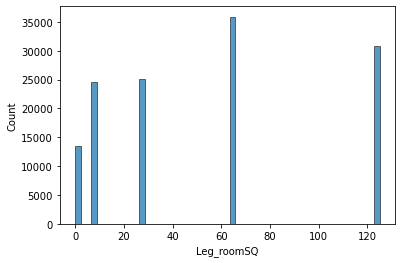

In [48]:
sat['Leg_roomSQ'] = sat['Leg_room_service'] ** 3
sns.histplot(sat['Leg_roomSQ'])

In [49]:
dv = "Leg_roomSQ"
cols = list(dummy.columns) + ['Age_divided_at_60']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),6.308392e+06,1.0,3206.293267,0.000000e+00
C(Type_of_Travel_Personal_Travel),9.052160e+05,1.0,460.083620,6.934352e-102
C(Class_Business),7.557180e+06,1.0,3841.000326,0.000000e+00
C(Class_Eco),4.410374e+04,1.0,22.416096,2.197576e-06
C(Class_Eco_Plus),1.068488e+04,1.0,5.430681,1.978748e-02
C(Gender_Female),3.658764e+06,1.0,1859.597439,0.000000e+00
C(Gender_Male),6.698825e+06,1.0,3404.733886,0.000000e+00
C(Customer_Type_Loyal_Customer),8.269500e+06,1.0,4203.043087,0.000000e+00
C(Customer_Type_disloyal_Customer),6.864747e+05,1.0,348.906551,9.277381e-78
C(Age_divided_at_60),5.259809e+05,1.0,267.334217,4.966221e-60


## Significantly diff

## Age 30

In [50]:
dv = "Leg_roomSQ"
cols = list(dummy.columns) + ['Age_30']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),1.038423e+07,1.0,5268.164331,0.000000e+00
C(Type_of_Travel_Personal_Travel),1.410314e+06,1.0,715.485962,3.434182e-157
C(Class_Business),8.931098e+06,1.0,4530.958199,0.000000e+00
C(Class_Eco),1.545805e+05,1.0,78.422375,8.422011e-19
C(Class_Eco_Plus),2.338738e+00,1.0,0.001186,9.725219e-01
C(Gender_Female),6.501369e+06,1.0,3298.298882,0.000000e+00
C(Gender_Male),1.083021e+07,1.0,5494.423187,0.000000e+00
C(Customer_Type_Loyal_Customer),1.004460e+07,1.0,5095.862080,0.000000e+00
C(Customer_Type_disloyal_Customer),1.382781e+06,1.0,701.517680,3.604010e-154
C(Age_30),5.522810e+04,1.0,28.018529,1.203539e-07


## Age has significance

## On-board Service

<AxesSubplot:xlabel='On-board_service', ylabel='Count'>

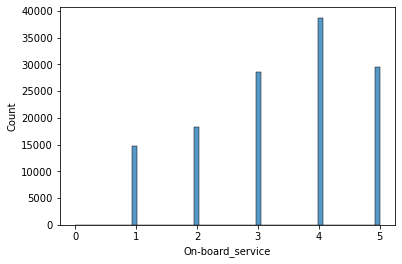

In [51]:
sns.histplot(sat['On-board_service'])

<AxesSubplot:xlabel='Onboard_servicecube', ylabel='Count'>

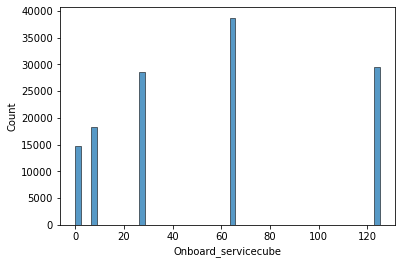

In [52]:
sat['Onboard_servicecube'] = sat['On-board_service'] ** 3
sns.histplot(sat['Onboard_servicecube'])

In [53]:
dv = "Onboard_servicecube"
cols = list(dummy.columns) + ['Age_divided_at_60']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),1.330299e+06,1.0,717.047985,1.577702e-157
C(Type_of_Travel_Personal_Travel),6.856844e+06,1.0,3695.926214,0.000000e+00
C(Class_Business),1.520392e+07,1.0,8195.107821,0.000000e+00
C(Class_Eco),3.589748e+04,1.0,19.349197,1.089514e-05
C(Class_Eco_Plus),1.540075e+05,1.0,83.011986,8.267222e-20
C(Gender_Female),6.690937e+06,1.0,3606.500222,0.000000e+00
C(Gender_Male),6.433602e+06,1.0,3467.793595,0.000000e+00
C(Customer_Type_Loyal_Customer),6.512792e+06,1.0,3510.477622,0.000000e+00
C(Customer_Type_disloyal_Customer),2.192200e+06,1.0,1181.623487,8.734478e-258
C(Age_divided_at_60),1.753181e+05,1.0,94.498691,2.495951e-22


### Business travel, eco and eco plus class and age 60 were sig dif

## Online boarding

<AxesSubplot:xlabel='Online_boarding', ylabel='Count'>

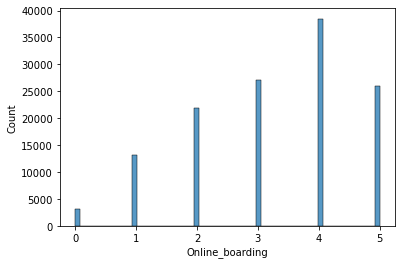

In [54]:
sns.histplot(sat['Online_boarding'])

<AxesSubplot:xlabel='Online_boardingcube', ylabel='Count'>

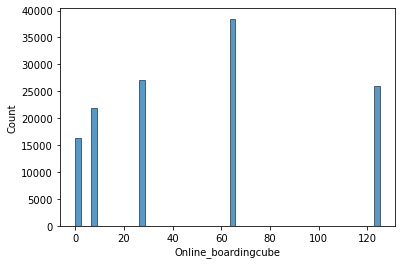

In [55]:
sat['Online_boardingcube'] = sat['Online_boarding'] **3
sns.histplot(sat['Online_boardingcube'])

In [56]:
dv = "Online_boardingcube"
cols = list(dummy.columns) + ['Age_divided_at_60']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),1.235401e+07,1.0,7681.689778,0.000000e+00
C(Type_of_Travel_Personal_Travel),2.448968e+04,1.0,15.227619,9.534744e-05
C(Class_Business),1.189548e+07,1.0,7396.575900,0.000000e+00
C(Class_Eco),5.907285e+04,1.0,36.731337,1.359539e-09
C(Class_Eco_Plus),1.886510e+05,1.0,117.302652,2.531652e-27
C(Gender_Female),7.452604e+06,1.0,4634.008790,0.000000e+00
C(Gender_Male),2.251829e+06,1.0,1400.180909,8.179742e-305
C(Customer_Type_Loyal_Customer),2.561777e+07,1.0,15929.059265,0.000000e+00
C(Customer_Type_disloyal_Customer),9.989821e+05,1.0,621.164364,8.771805e-137
C(Age_divided_at_60),7.443383e+04,1.0,46.282752,1.028021e-11


## eco class and age 60 sig dif

## Age 30

In [57]:
dv = "Online_boardingcube"
cols = list(dummy.columns) + ['Age_30']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),1.466501e+07,1.0,9167.861310,0.000000e+00
C(Type_of_Travel_Personal_Travel),1.247276e+03,1.0,0.779737,3.772232e-01
C(Class_Business),1.219264e+07,1.0,7622.253552,0.000000e+00
C(Class_Eco),3.799000e+04,1.0,23.749522,1.098517e-06
C(Class_Eco_Plus),1.527201e+05,1.0,95.473249,1.526112e-22
C(Gender_Female),9.607316e+06,1.0,6006.031975,0.000000e+00
C(Gender_Male),2.964440e+06,1.0,1853.225152,0.000000e+00
C(Customer_Type_Loyal_Customer),2.384186e+07,1.0,14904.782577,0.000000e+00
C(Customer_Type_disloyal_Customer),4.510140e+05,1.0,281.952260,3.288542e-63
C(Age_30),1.195249e+06,1.0,747.212291,4.739946e-164


## Age is the main effect

## Seat Comfort


<AxesSubplot:xlabel='Seat_comfort', ylabel='Count'>

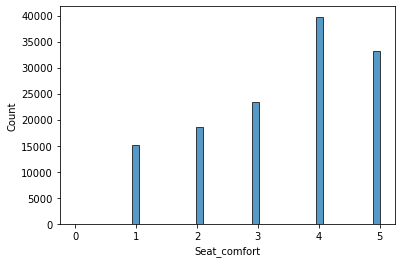

In [58]:
sns.histplot(sat['Seat_comfort'])

<AxesSubplot:xlabel='Seat_comfortcube', ylabel='Count'>

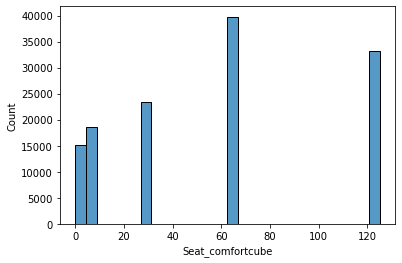

In [59]:
sat['Seat_comfortcube'] = sat['Seat_comfort'] ** 3
sns.histplot(sat['Seat_comfortcube'])

In [60]:
dv = "Seat_comfortcube"
cols = list(dummy.columns) + ['Age_divided_at_60']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),7.182323e+06,1.0,3710.202595,0.000000e+00
C(Type_of_Travel_Personal_Travel),1.572930e+06,1.0,812.534968,3.612093e-178
C(Class_Business),9.902022e+06,1.0,5115.128498,0.000000e+00
C(Class_Eco),6.667944e+04,1.0,34.444875,4.395559e-09
C(Class_Eco_Plus),1.857029e+04,1.0,9.592930,1.953697e-03
C(Gender_Female),8.792717e+06,1.0,4542.090145,0.000000e+00
C(Gender_Male),4.761094e+06,1.0,2459.458046,0.000000e+00
C(Customer_Type_Loyal_Customer),1.933220e+07,1.0,9986.515747,0.000000e+00
C(Customer_Type_disloyal_Customer),1.185223e+04,1.0,6.122554,1.334805e-02
C(Age_divided_at_60),3.529914e+03,1.0,1.823462,1.769041e-01


## Class has a big effect

## Age 30

In [61]:
dv = "Seat_comfortcube"
cols = list(dummy.columns) + ['Age_30']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),9.368648e+06,1.0,4865.354183,0.000000e+00
C(Type_of_Travel_Personal_Travel),2.388144e+06,1.0,1240.218057,2.112177e-270
C(Class_Business),1.061843e+07,1.0,5514.396134,0.000000e+00
C(Class_Eco),1.542827e+05,1.0,80.122542,3.563779e-19
C(Class_Eco_Plus),2.284751e+03,1.0,1.186524,2.760339e-01
C(Gender_Female),1.257572e+07,1.0,6530.859598,0.000000e+00
C(Gender_Male),7.080882e+06,1.0,3677.264639,0.000000e+00
C(Customer_Type_Loyal_Customer),1.846749e+07,1.0,9590.593802,0.000000e+00
C(Customer_Type_disloyal_Customer),3.280921e+05,1.0,170.385797,6.448191e-39
C(Age_30),1.334282e+06,1.0,692.923411,2.604338e-152


## Age has a big effect

## Inflight Service

<AxesSubplot:xlabel='Inflight_service', ylabel='Count'>

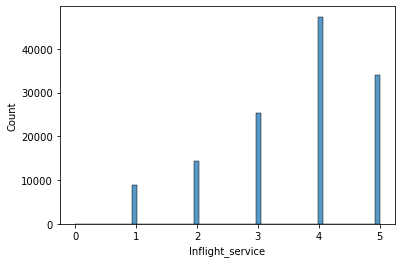

In [62]:
sns.histplot(sat['Inflight_service'])

<AxesSubplot:xlabel='Inflight_servicecube', ylabel='Count'>

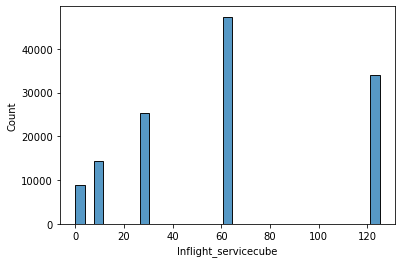

In [63]:
sat['Inflight_servicecube'] = sat['Inflight_service'] ** 3
sns.histplot(sat['Inflight_servicecube'])

In [64]:
dv = "Inflight_servicecube"
cols = list(dummy.columns) + ['Age_30']
string_var = dv + " ~ C(" + cols[0] + ")"
for col in cols[1:]:
    string_var = string_var + " + C(" + col +")"
string_var

model =ols (string_var, data =sat).fit()

anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Type_of_Travel_Business_travel),1.124785e+06,1.0,635.157210,8.211226e-140
C(Type_of_Travel_Personal_Travel),1.599522e+07,1.0,9032.375467,0.000000e+00
C(Class_Business),1.976246e+07,1.0,11159.702628,0.000000e+00
C(Class_Eco),3.137505e+02,1.0,0.177172,6.738153e-01
C(Class_Eco_Plus),1.225960e+04,1.0,6.922900,8.510892e-03
C(Gender_Female),1.148298e+07,1.0,6484.347230,0.000000e+00
C(Gender_Male),1.707300e+07,1.0,9640.985958,0.000000e+00
C(Customer_Type_Loyal_Customer),3.857310e+06,1.0,2178.192329,0.000000e+00
C(Customer_Type_disloyal_Customer),9.235399e+06,1.0,5215.156462,0.000000e+00
C(Age_30),1.286030e+05,1.0,72.621087,1.587379e-17


## Age, eco class, and business travel is sig dif